## Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать данные в закрепе к уроку

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium

In [3]:
percentil_3s = 99  # 97.5% всех домов (3 сигмы)

In [4]:
# 1.1. Скачать данные в закрепе к уроку
df = pd.read_csv('kc_house_data.csv')
df.sample(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9343,6743700317,20150204T000000,582500.0,2,1.00,1140,23779,1.5,0,0,...,6,1140,0,1966,0,98033,47.6948,-122.172,2940,8417
2542,5560000710,20150327T000000,210000.0,3,1.00,1040,8970,1.0,0,0,...,6,1040,0,1961,0,98023,47.3283,-122.337,1040,8450
10724,4279900140,20141001T000000,251000.0,4,2.00,1650,5974,1.0,0,0,...,7,860,790,1972,0,98178,47.5008,-122.257,1940,6001
20374,8138870470,20140707T000000,494815.0,3,2.50,1910,2091,2.0,0,0,...,8,1910,0,2014,0,98029,47.5445,-122.013,1630,1546
3954,7964410100,20150504T000000,700000.0,4,3.50,5360,25800,1.0,0,0,...,9,3270,2090,1971,0,98074,47.6099,-122.054,2650,21781
18876,9808700025,20150211T000000,1500000.0,3,1.50,1910,21374,1.0,0,0,...,8,1910,0,1955,0,98004,47.6453,-122.214,2850,16167
2941,1950900245,20141226T000000,123300.0,3,1.00,1150,8050,1.5,0,0,...,7,1150,0,1956,0,98032,47.3740,-122.296,1360,8050
18522,2722049218,20141027T000000,287500.0,4,2.25,2250,12000,2.0,0,0,...,8,2250,0,1985,0,98032,47.3715,-122.274,2140,11871
2374,1330900570,20141106T000000,575000.0,4,2.50,2520,35636,2.0,0,0,...,8,2520,0,1980,0,98053,47.6520,-122.031,2230,35673
11570,3888100117,20141110T000000,510000.0,5,1.50,1550,9750,1.0,0,0,...,7,1550,0,1966,0,98033,47.6811,-122.169,1970,9750


### 1.2. Изучите стоимости недвижимости
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [5]:
data = df['price']
title_txt = 'Распределение стоимости жилья по интервалам цены'
NDFrameT = round(data.describe([.25, .5, .75, percentil_3s/100]))
print(NDFrameT[7])
NDFrameT

1964400.0


count      21613.0
mean      540088.0
std       367127.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
99%      1964400.0
max      7700000.0
Name: price, dtype: float64

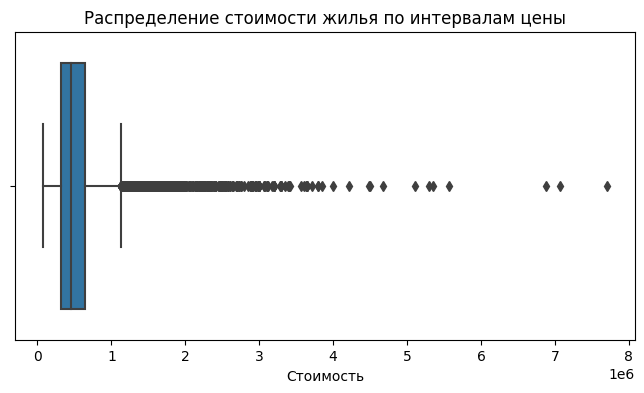

In [6]:
plt.figure(figsize=(8, 4))
sb.boxplot(x=data)
plt.title(title_txt)
plt.xlabel('Стоимость');

- Стоимость основной массы домов идет в интервале до чуть больше $1 млн.
- Поэтому для дальнейшего анализа построим гистограмму в пределах указанного диапазона, а это соответствует 2-м стандартным отклонениям от среднего ~ 97.5%:

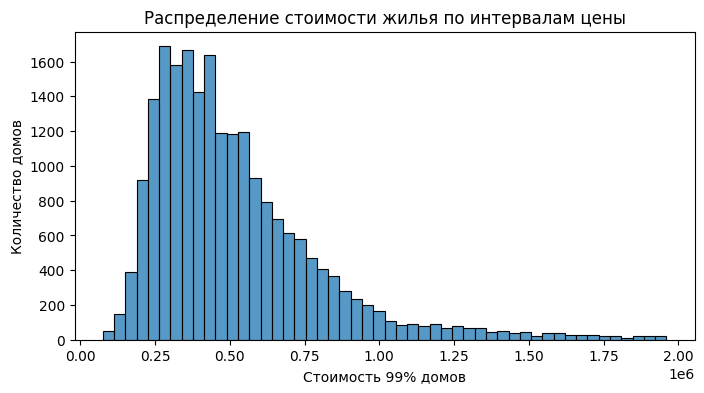

In [7]:
value_to = NDFrameT[7]          # 97.5% домов
plt.figure(figsize=(8, 4))
sb.histplot(df[data < value_to]['price'], bins=50)
plt.title(title_txt)
plt.xlabel(f'Стоимость {percentil_3s}% домов')
plt.ylabel('Количество домов');

*Выводы:*
1) Основная масса домов идет в интервале до 1.5 млн. (1 485 000) USD
2) При этом:
- 75% до 645 000 USD
- минимальная стоимость = 75 000 USD
- средняя ~ 540 000 USD
3) Т.е. основное число домов сконцентрировано в узком диапазоне среднего значения (~ 0.5 млн.USD)
4) Дома со стоимостью в 6 и 7 млн. USD единицы, данные о них могут быть выбросами и требуют отдельного изучения

### 1.3. Изучите распределение квадратуры жилой площади
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [8]:
data = df['sqft_living']
title_txt = 'Распределение квадратуры жилой площади'
NDFrameT = round(data.describe([.25, .5, .75, percentil_3s/100]))
print(NDFrameT[7])
NDFrameT

4979.0


count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
99%       4979.0
max      13540.0
Name: sqft_living, dtype: float64

In [9]:
data2 = data.value_counts()
data2.head()

1300    138
1400    135
1440    133
1800    129
1660    129
Name: sqft_living, dtype: int64

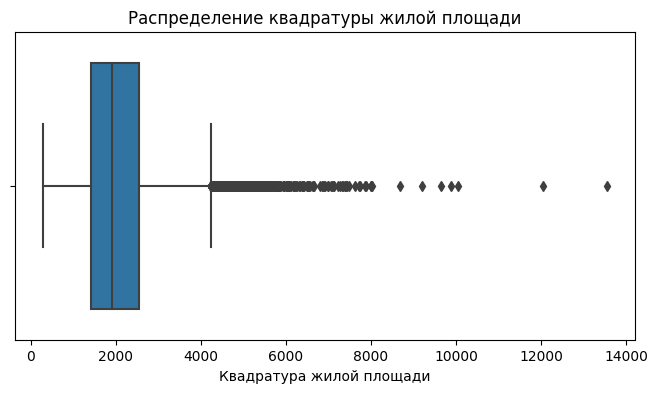

In [10]:
plt.figure(figsize=(8, 4))
sb.boxplot(x=data)
plt.title(title_txt)
plt.xlabel('Квадратура жилой площади');

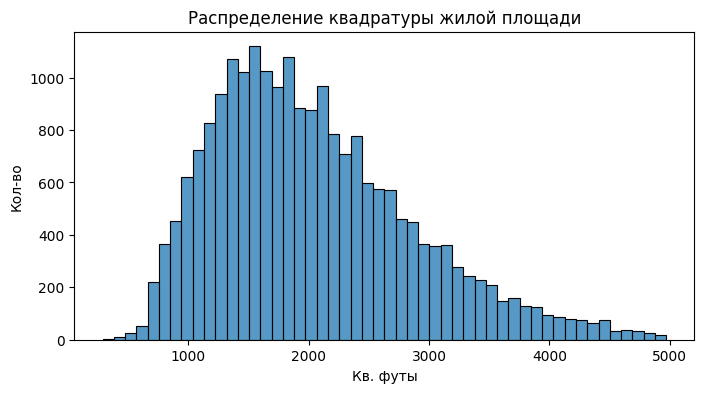

In [11]:
value_to = NDFrameT[7]          # 97,5% домов
plt.figure(figsize=(8, 4))
sb.histplot(df[data < value_to]['sqft_living'], bins=50)

plt.title(title_txt)
plt.xlabel('Кв. футы')
plt.ylabel('Кол-во');

*Выводы:*
1) Основная масса домов имеет жилую квадратуру до 4300 ft $^2$
2) При этом:
- 75% до 2500 ft $^2$
- минимальная квадратура = 300 ft $^2$
- средняя ~ 2800 ft $^2$
3) Т.е. основное число домов сконцентрировано в диапазоне от 300 до 3000 ft $^2$
4) Домов с плащадью более 10 000 ft $^2$ единицы, данные о них могут быть выбросами и требуют отдельного изучения

### 1.4 Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [12]:
data = df['yr_built']
title_txt = 'Распределение года постройки'
data.describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [13]:
print(data.unique().shape, data.unique(), sep='\n')
data2 = data.value_counts().reset_index()
data2

(116,)
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]


,index,yr_built
0,2014,559
1,2006,454
2,2005,450
3,2004,433
4,2003,422
...,...,...
111,1933,30
112,1901,29
113,1902,27
114,1935,24


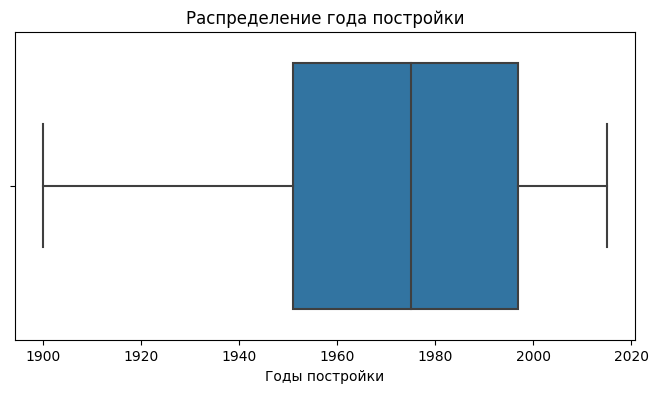

In [14]:
plt.figure(figsize=(8, 4))
sb.boxplot(x=data)
plt.title(title_txt)
plt.xlabel('Годы постройки');

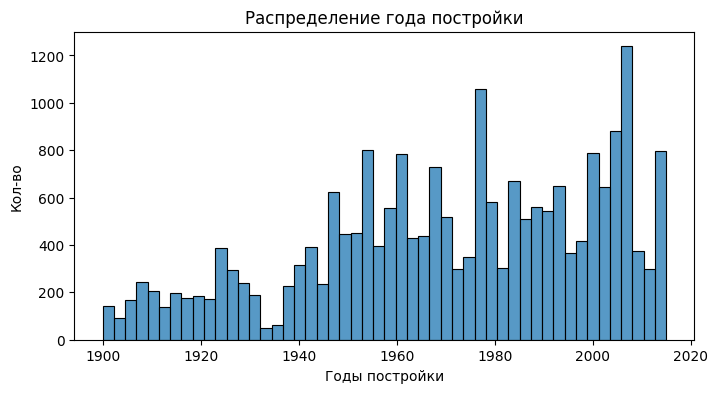

In [15]:
plt.figure(figsize=(8, 4))
sb.histplot(df['yr_built'], bins=50)
plt.title(title_txt)
plt.xlabel('Годы постройки')
plt.ylabel('Кол-во');

*Выводы:*
1) Есть достаточно домов вековой давности
2) При этом с ростом года постройки растет и число домов
3) Судя по графику "ящик с усами" основное число домов широко распределены по годам постройки, также совсем отсутствуют выбросы

---

## Задача 2 
(Постройте график. Сделайте выводы)
- Изучите распределение домов от наличия вида на набережную
- Изучите распределение этажей домов
- Изучите распределение состояния домов

### 2.1 Изучите распределение домов от наличия вида на набережную 

In [16]:
data = df.waterfront.value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

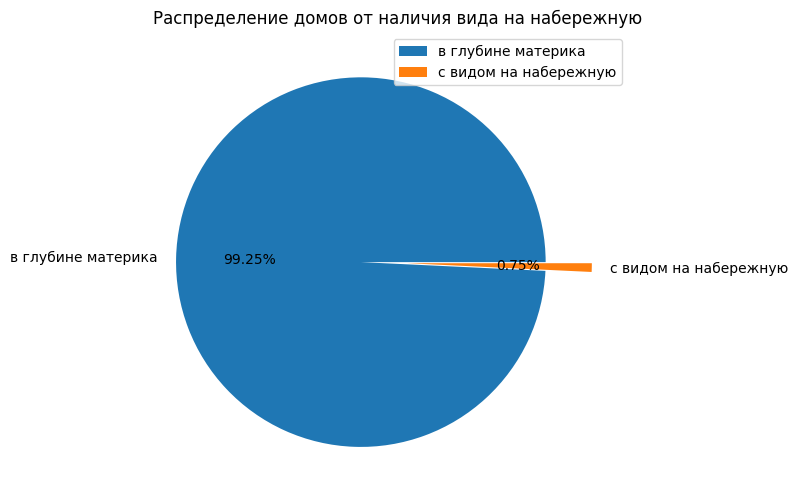

In [17]:
plt.figure(figsize=(6, 6))
expl = [0.2, 0.05]
classes = ['в глубине материка', 'с видом на набережную']
plt.pie(data.values, autopct='%1.2f%%', labels=classes, explode=expl)
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(classes);

*Выводы:*  
Менее 1% домов имеют вид на набережную, основная часть находится в глубине материка

### 2.2 Изучите распределение этажей домов

In [18]:
data = df.floors.value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

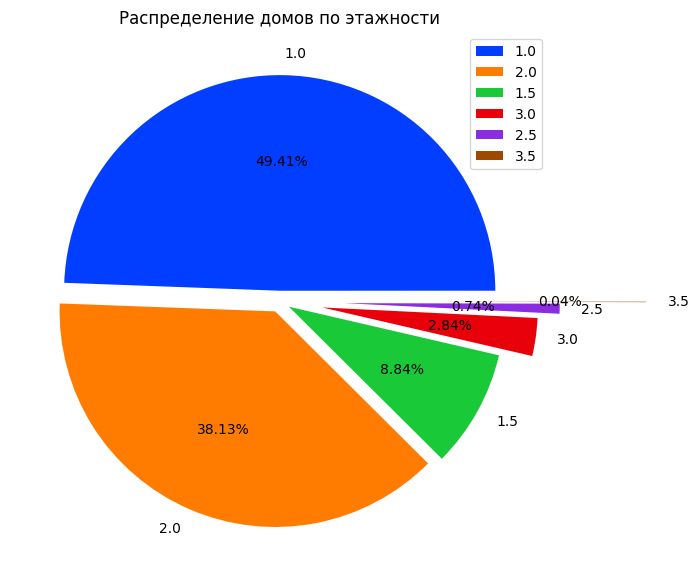

In [19]:
plt.figure(figsize=(7, 7))
expl = [0.05, 0.05, 0.05, 0.2, 0.3, 0.7]

colors = sb.color_palette('bright')
plt.pie(data.values, autopct='%1.2f%%', labels=data.index, explode=expl, colors=colors)

plt.title('Распределение домов по этажности')
plt.legend(data.index, loc='best');

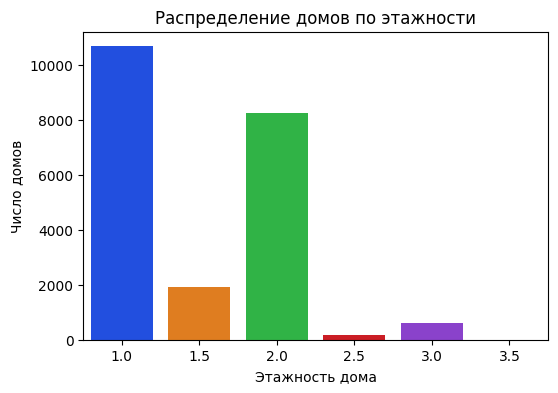

In [20]:
plt.figure(figsize=(6, 4))
sb.barplot(x=data.index, y=data.values, palette='bright')   # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.title('Распределение домов по этажности')
plt.xlabel('Этажность дома')
plt.ylabel('Число домов');

*Выводы:*  
В основном преобладают дома с одним или двумя этажами.

### 2.3 Изучите распределение состояния домов

In [21]:
data = df.condition.value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

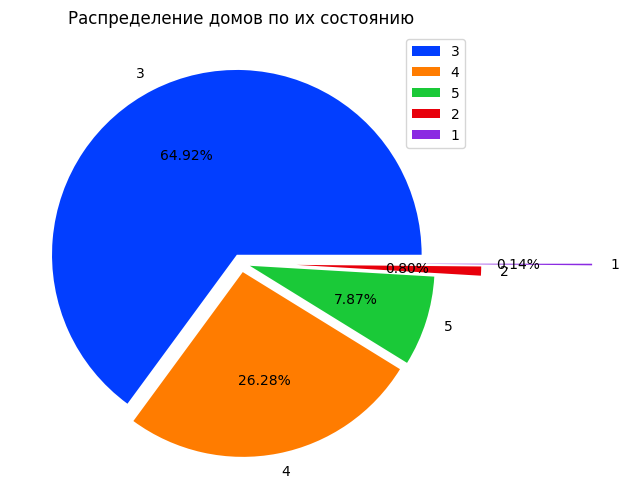

In [22]:
plt.figure(figsize=(6, 6))
expl = [0.05, 0.05, 0.05, 0.3, 0.9]

colors = sb.color_palette('bright')
plt.pie(data.values, autopct='%1.2f%%', labels=data.index, explode=expl, colors=colors)

plt.title('Распределение домов по их состоянию')
plt.legend(data.index, loc='best');

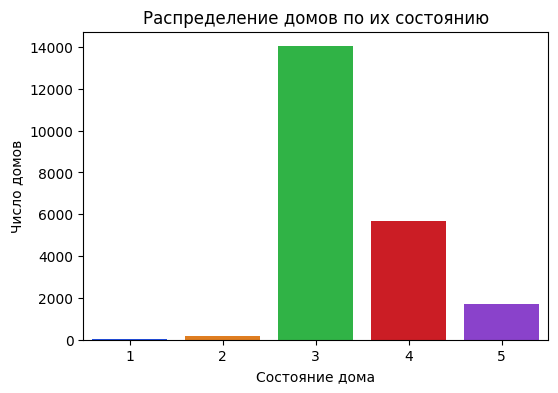

In [23]:
plt.figure(figsize=(6, 4))
sb.barplot(x=data.index, y=data.values, palette='bright')   
plt.title('Распределение домов по их состоянию')
plt.xlabel('Состояние дома')
plt.ylabel('Число домов');

*Выводы:*
1) Плохое состояние (ниже среднего) имеет незначительное число домов
2) Подавляещее число домов имеют среднее состояние и выше

---

##  Задача 3
**Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.**  
**Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.**

Для выявления характеристик наиболее сильно влияющих на стоимость недвижимости сначала составим матрицу корреляции:

In [24]:
c_mx = np.round(df.corr(numeric_only=True), 2)
c_mx[np.abs(c_mx) < 0.3] = 0

# Оставим только те характеристики, которые имеют не нулевую корреляцию со стоимостью недвижимости 
# Отсортируем по уменьшению коэффициента корреляции (price) - c_mx.loc[:, (c_mx != 0).any(axis=0)]
c_mx = c_mx[c_mx.price > 0]
c_mx = c_mx.loc[:, (c_mx.loc['price'] != 0)].sort_values('price', ascending=False)
corr_matrix_price = c_mx[[el for el in c_mx.index]]
corr_matrix_price

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat
price,1.00,0.70,0.67,0.61,0.59,0.53,0.4,0.32,0.31,0.31
sqft_living,0.70,1.00,0.76,0.88,0.76,0.75,0.0,0.44,0.58,0.00
grade,0.67,0.76,1.00,0.76,0.71,0.66,0.0,0.00,0.36,0.00
sqft_above,0.61,0.88,0.76,1.00,0.73,0.69,0.0,0.00,0.48,0.00
sqft_living15,0.59,0.76,0.71,0.73,1.00,0.57,0.0,0.00,0.39,0.00
bathrooms,0.53,0.75,0.66,0.69,0.57,1.00,0.0,0.00,0.52,0.00
view,0.40,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00
sqft_basement,0.32,0.44,0.00,0.00,0.00,0.00,0.0,1.00,0.30,0.00
bedrooms,0.31,0.58,0.36,0.48,0.39,0.52,0.0,0.30,1.00,0.00
lat,0.31,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00


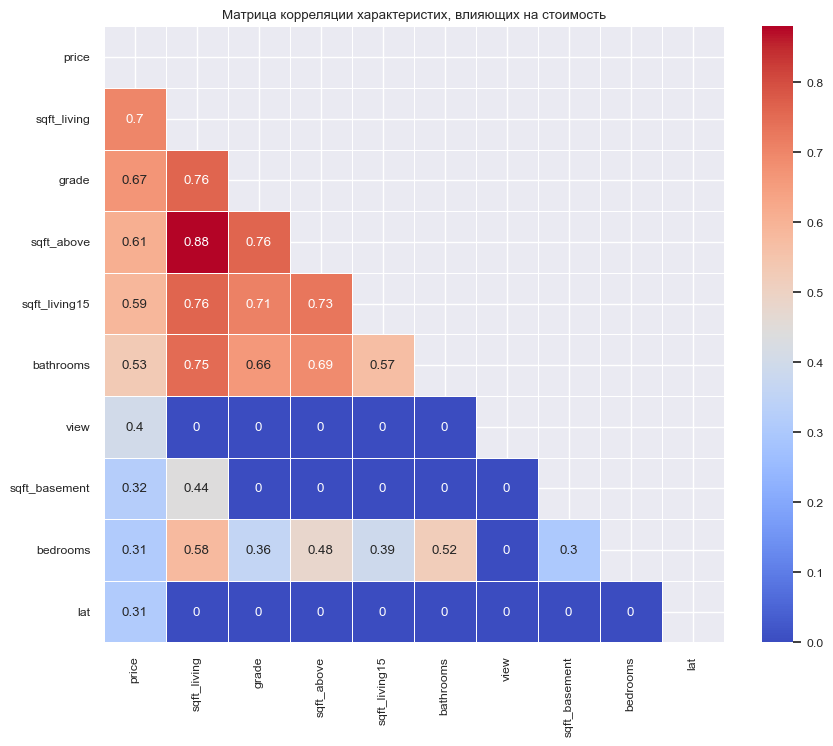

In [25]:
plt.figure(figsize=(10, 8))
sb.set(font_scale=0.8)
upp_mat = np.triu(corr_matrix_price.corr(numeric_only=True))
sb.heatmap(corr_matrix_price, annot=True, linewidths=.5, mask=upp_mat, cmap='coolwarm')
plt.title('Матрица корреляции характеристих, влияющих на стоимость');

Судя по диаграмме анализируемые характеристики четко разделены на 2-е группы - с коэффициентом более 0.5 и менее 0.5.  
Продолжим исследования для характеристик 1-й группы, для которых коэфф. корреляции > 0.5 (таких характеристик - 5), но мы из них  оставим только 3, характеристики sqft_above и sqft_living15 исключим ввиду схожести по виду и сильной взаимной корреляции, что делает их использование малоинформативным.  
Дополнительно включим в число анализируемых характеристик view (коэфф. > 0.3 и сама по себе признаковая характеристика интересна для анализа).  
Таким образом проанализируем следующие характеристики:  
- sqft_living - Квадратные футы внутренней жилой площади квартиры
- grade	- уровень строительства и проектирования
- bathrooms - количество ванных комнат
- view - вид на недвижимость	

In [26]:
select_columns = ['price', 'sqft_living', 'grade', 'bathrooms', 'view']
corr_matrix_select = corr_matrix_price.loc[select_columns, select_columns]
corr_matrix_select

,price,sqft_living,grade,bathrooms,view
price,1.00,0.70,0.67,0.53,0.4
sqft_living,0.70,1.00,0.76,0.75,0.0
grade,0.67,0.76,1.00,0.66,0.0
bathrooms,0.53,0.75,0.66,1.00,0.0
view,0.40,0.00,0.00,0.00,1.0


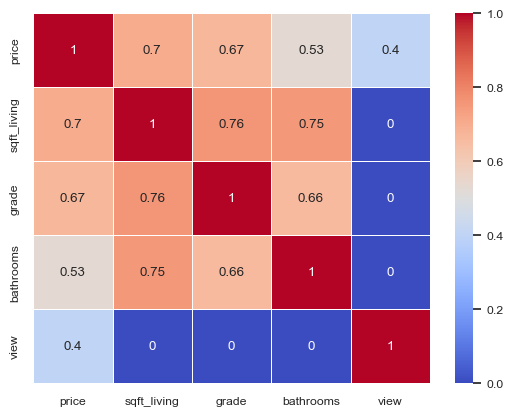

In [27]:
sb.heatmap(corr_matrix_select, annot=True, linewidths=0.5, cmap='coolwarm');

Построим для всех выбранных характеристик сравнительные диаграммы, детально отражающую линейную связь отобранных характеристик со стоимостью квартиры. 

Сначала проведем точечную матричную оценку

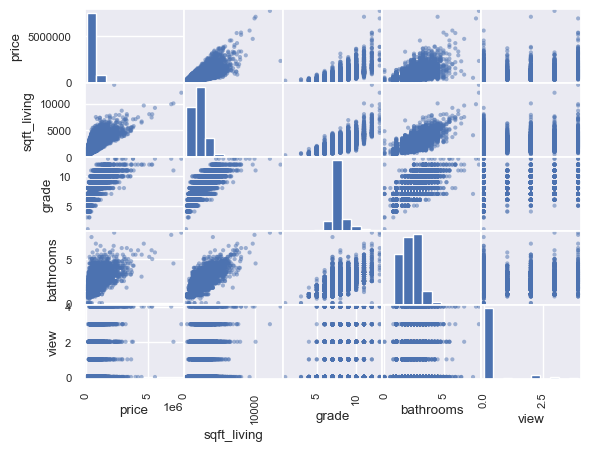

In [28]:
pd.plotting.scatter_matrix(df[select_columns]);

_Матричная оценка визуально показывает, что все выбранные характеристики неплохо коррелируют со стоимостью недвижимости_ 

Теперь построим совместное со стоимостью распределение для более детального отражения влияния каждой из характеристик

**_Влияние площади дома на его стоимость_**

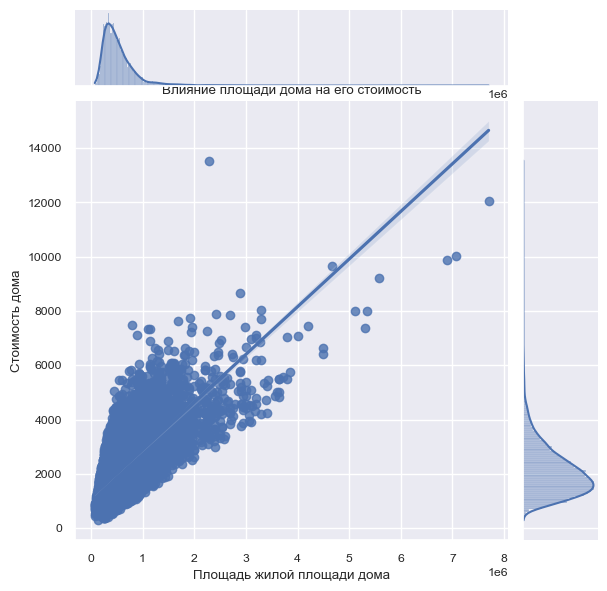

In [29]:
sb.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.title('Влияние площади дома на его стоимость')
plt.xlabel('Площадь жилой площади дома')
plt.ylabel('Стоимость дома');

_Графическое отражение подтверждает сильную линейную зависимость стоимости дома от размера жилой площади_

**_Влияние уровня строительства дома на его стоимость_**

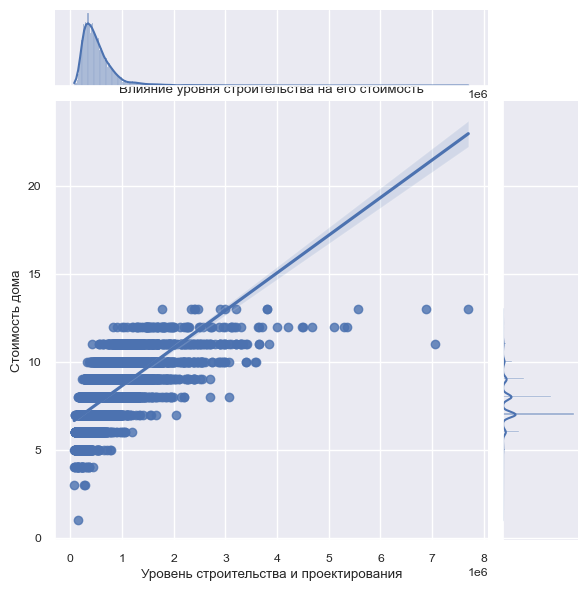

In [30]:
sb.jointplot(x=df['price'], y=df['grade'], kind='reg')
plt.title('Влияние уровня строительства на его стоимость')
plt.xlabel('Уровень строительства и проектирования')
plt.ylabel('Стоимость дома');

_Стоимость дома также сильно зависит уровня проектирования и строительства до ценового уровня 10 млн.USD Далее зависимость практически не прослеживается. В ценовой категории более 10 млн.USD на стоимость влияют другие характеристики._

**_Влияние числа ванных комнат в доме на его стоимость_**

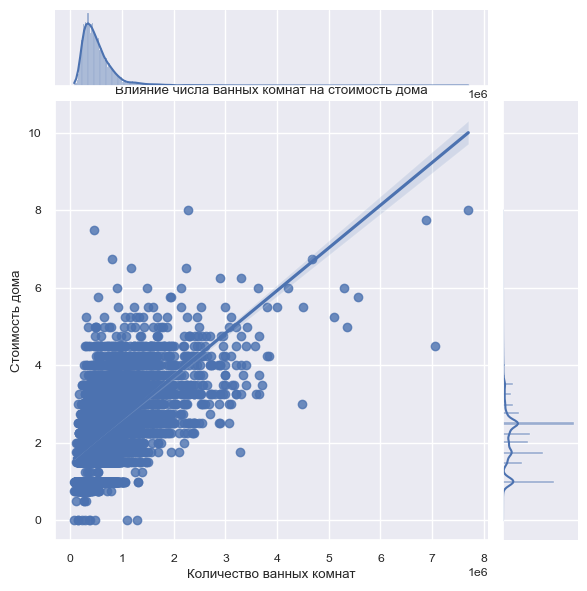

In [31]:
sb.jointplot(x=df['price'], y=df['bathrooms'], kind='reg')
plt.title('Влияние числа ванных комнат на стоимость дома')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Стоимость дома');

_Стоимость дома сильно зависит от числа ванных комнат_

**_Влияние внешнего вида дома на его стоимость_**

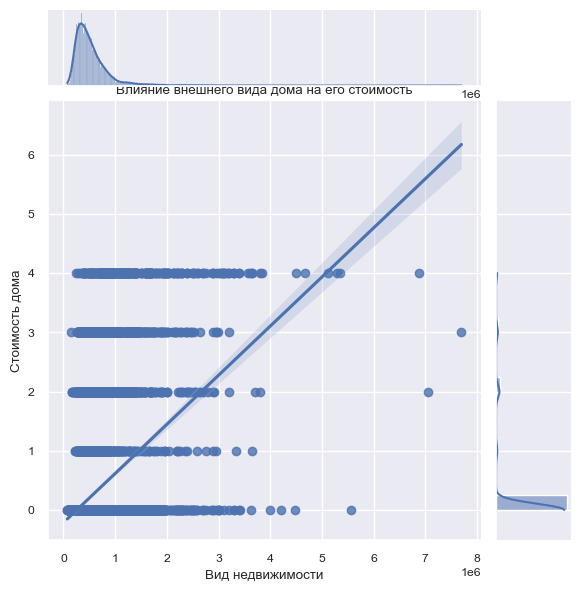

In [32]:
mask_3s = df['price'] < value_to
sb.jointplot(x=df['price'], y=df['view'], kind='reg')
plt.title('Влияние внешнего вида дома на его стоимость')
plt.xlabel('Вид недвижимости')
plt.ylabel('Стоимость дома');

_Зависимость стоимости домов от его внешнего вида слабо заметна. В одной и той же ценовой категории есть много домов с разной оценкой вида недвижимости_

#### В завершении создадим интерактивную карту и разместим на ней дома из базы данных c привязкой их к геоданным и указанием при нажатии их стоимости, количества спален и ванн, а также года постройки.

In [ ]:
this_map = folium.Map(perfer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
    location=[point.lat, point.long],
    radius=2,
    popup=(point.price, point.bedrooms, point.bathrooms, point.yr_built)).add_to(this_map)
    
df.apply(plotDot, axis=1)
this_map.fit_bounds(this_map.get_bounds())

this_map